<a href="https://colab.research.google.com/github/nandiniii2404/SVM/blob/main/SVM_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import urllib.request
import os


In [10]:
# Download and extract UCI HAR Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
filename = 'UCI_HAR_Dataset.zip'

if not os.path.exists('UCI HAR Dataset'):
    urllib.request.urlretrieve(url, filename)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()


In [11]:
# Load features and activity labels
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

# Combine train and test sets
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test]).values.ravel()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-11-5b73cdaa2fb6>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-11-5b73cdaa2fb6>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-11-5b73cdaa2fb6>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
<ipython-input-11-5b73cdaa2fb6>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_

In [12]:
samples = []
for i in range(10):
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
        X_scaled, y, test_size=0.3, random_state=i)
    samples.append((X_train_sample, X_test_sample, y_train_sample, y_test_sample))


In [13]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'nu': np.linspace(0.01, 0.5, 10)
}

results = []
convergence_logs = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(samples):
    best_acc = 0
    best_params = {}
    acc_log = []

    for params in ParameterGrid(param_grid):
        try:
            model = NuSVC(kernel=params['kernel'], nu=params['nu'])
            model.fit(X_train, y_train)
            acc = model.score(X_test, y_test)
            acc_log.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = params
        except Exception:
            continue

    results.append({
        "Sample": f"S{idx+1}",
        "Best Accuracy": round(best_acc * 100, 2),
        "Best Parameters": best_params
    })
    convergence_logs.append(acc_log)


In [14]:
results_df = pd.DataFrame(results)
print(results_df)


  Sample  Best Accuracy                 Best Parameters
0     S1          98.90   {'kernel': 'rbf', 'nu': 0.01}
1     S2          98.80   {'kernel': 'rbf', 'nu': 0.01}
2     S3          98.96   {'kernel': 'rbf', 'nu': 0.01}
3     S4          98.90   {'kernel': 'rbf', 'nu': 0.01}
4     S5          99.00   {'kernel': 'rbf', 'nu': 0.01}
5     S6          98.38   {'kernel': 'rbf', 'nu': 0.01}
6     S7          98.80   {'kernel': 'rbf', 'nu': 0.01}
7     S8          98.90   {'kernel': 'rbf', 'nu': 0.01}
8     S9          98.80   {'kernel': 'rbf', 'nu': 0.01}
9    S10          98.64  {'kernel': 'poly', 'nu': 0.01}


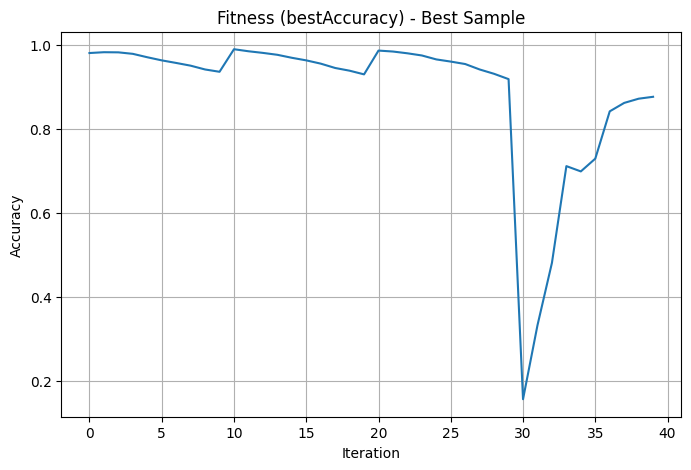

In [15]:
best_index = np.argmax([res["Best Accuracy"] for res in results])
best_convergence = convergence_logs[best_index]

plt.figure(figsize=(8, 5))
plt.plot(best_convergence)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Fitness (bestAccuracy) - Best Sample")
plt.grid(True)
plt.show()



In [16]:
# Save results to CSV
results_df.to_csv("svm_har_results.csv", index=False)
